In [30]:
from tensorflow import keras

mnist_model = keras.models.load_model('mnist_gpu_model.h5')

In [31]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 878,602
Trainable params: 878,602
Non-trainable params: 0
__________________________________________________

In [41]:
# 2. 손으로 그린 이미지 불러오기
import cv2

image_10 = cv2.imread('10.png', cv2.IMREAD_GRAYSCALE)
print(image_10.shape)

image_11 = cv2.imread('11.png', cv2.IMREAD_GRAYSCALE)
print(image_11.shape)

(272, 272)
(454, 453)


In [42]:
# 3. 이미지 리사이즈

image_10_resized = cv2.resize(image_10, dsize=(28,28))
print(image_10_resized.shape)

image_11_resized = cv2.resize(image_11, dsize=(28,28))
print(image_11_resized.shape)

(28, 28)
(28, 28)


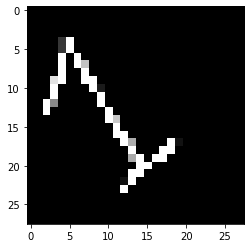

In [43]:
import matplotlib.pyplot as plt
plt.imshow(image_10_resized, cmap=plt.cm.gray)




In [44]:
# 5. 이미지 추론: 1 예측하기
# 3차원으로 reshape를 해줘야 모델이 인식이 가능하다.
result = mnist_model.predict(image_10_resized.reshape(1, 28, 28, 1))
print(result)


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


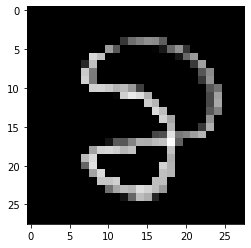

In [45]:

plt.imshow(image_11_resized, cmap=plt.cm.gray)

In [47]:
# 8 예측하기
result = mnist_model.predict(image_11_resized.reshape(1, 28, 28, 1))
print(result)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


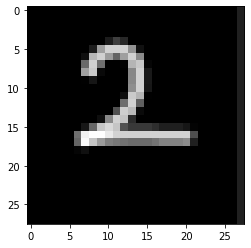

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


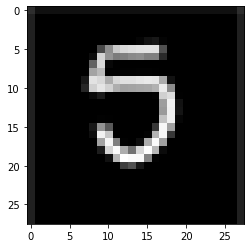

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


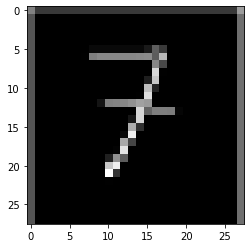

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


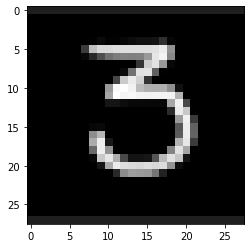

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


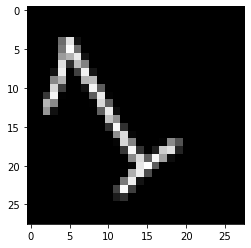

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


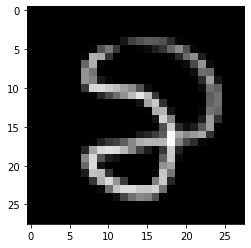

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


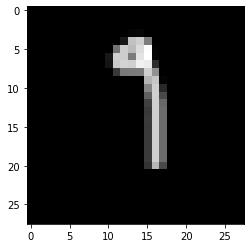

[[0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 1.557886e-28 0.000000e+00 0.000000e+00]]


In [50]:
image_size = (28, 28)
image_shape = (1, 28, 28, 1)

image_names = ['1.png','2.png', '3.png', '4.png', '10.png', '11.png', '12.png']

for image_name in image_names:
    image = cv2.imread(image_name,
                        cv2.IMREAD_GRAYSCALE)

# 이미지 사이즈 줄이기(28,28)
    image_resized = cv2.resize(image, dsize=image_size,
                                interpolation=cv2.INTER_AREA)

# 이미지 시각화
    plt.imshow(image_resized, cmap=plt.cm.gray)
    plt.show()

# 이미지 테스트 결과
    result = mnist_model.predict(image_resized.reshape(1, 28, 28, 1))
    print(result)